In [123]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
raw_data = pd.read_excel('overseas_arrivals.xlsx', sheet_name='Data1', skiprows=9)

# change how data is displayed
pd.set_option('display.precision', 2)      
pd.set_option('display.float_format', '{:,.2f}'.format)  

# Australia's Migration Patterns and Socioeconomic Impact (1976-2025)

This analysis explores Australia's permanent migration patterns over nearly five decades and examines their relationship with broader demographic and economic factors. By combining international arrivals data with population, GDP, and energy consumption metrics, we can identify key historical trends and policy impacts on Australia's migration landscape.

In [124]:
# check the data
raw_data.head(3)
#raw_data.info()

,Series ID,A85232567K,A85232562X,A85232555A,A85232568L,A85232565F,A85377103W,A85378045C,A85375847A,A85375533K,A85376475T,A85232561W,Unnamed: 12
0,1976-01-01,3780,5380,2750,11910,143370,NaN,NaN,47710,NaN,NaN,202990,NaN
1,1976-02-01,3900,4190,2730,10820,76370,NaN,NaN,49860,NaN,NaN,137040,NaN
2,1976-03-01,4790,4250,1940,10980,61900,NaN,NaN,46100,NaN,NaN,118980,NaN


In [125]:
# Drop the last column
raw_data = raw_data.iloc[:, :-1]

# Set first column ('Series ID') as the index (or rename if needed)
raw_data.set_index('Series ID', inplace=True)

# Drop columns where all values are NaN
raw_data = raw_data.dropna(axis=1, how='all')

column_names = [
    "Permanent Arrivals",
    "Long-term Residents Returning",
    "Long-term Visitors Arriving",
    "Permanent + Long-term Arrivals",
    "Short-term Residents Returning",
    "Short-term Visitors Arriving",
    "Total Arrivals"
]

raw_data.columns = column_names

raw_data.index.name = 'Date'

## Data Preparation

The dataset contains Australian overseas arrivals data from 1976 to 2025, categorized by different types of arrivals:

- **Permanent Arrivals**: People migrating to Australia permanently
- **Long-term Arrivals**: Visitors or returning residents staying 12+ months
- **Short-term Arrivals**: Visitors or returning residents staying less than 12 months

We're particularly interested in permanent arrivals as they represent Australia's immigration inflow and have the most significant long-term impact on population dynamics and resource consumption.

In [126]:
# data looks good, whta can we do with this intel ? 
data = raw_data.copy()
# craete a function to look at the summary data
def describe_series(series):
    return pd.DataFrame({
        'Min': series.min(),
        'Max': series.max(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Range': series.max() - series.min(),
        'Count': series.count(),
        'Missing': series.isna().sum()
    }, index=[series.name])

# apply the function 
describe_series(data['Total Arrivals'])

,Min,Max,Mean,Median,Std Dev,Range,Count,Missing
Total Arrivals,14940,2383330,"739,450.95","625,020.00","536,301.30",2368390,591,0


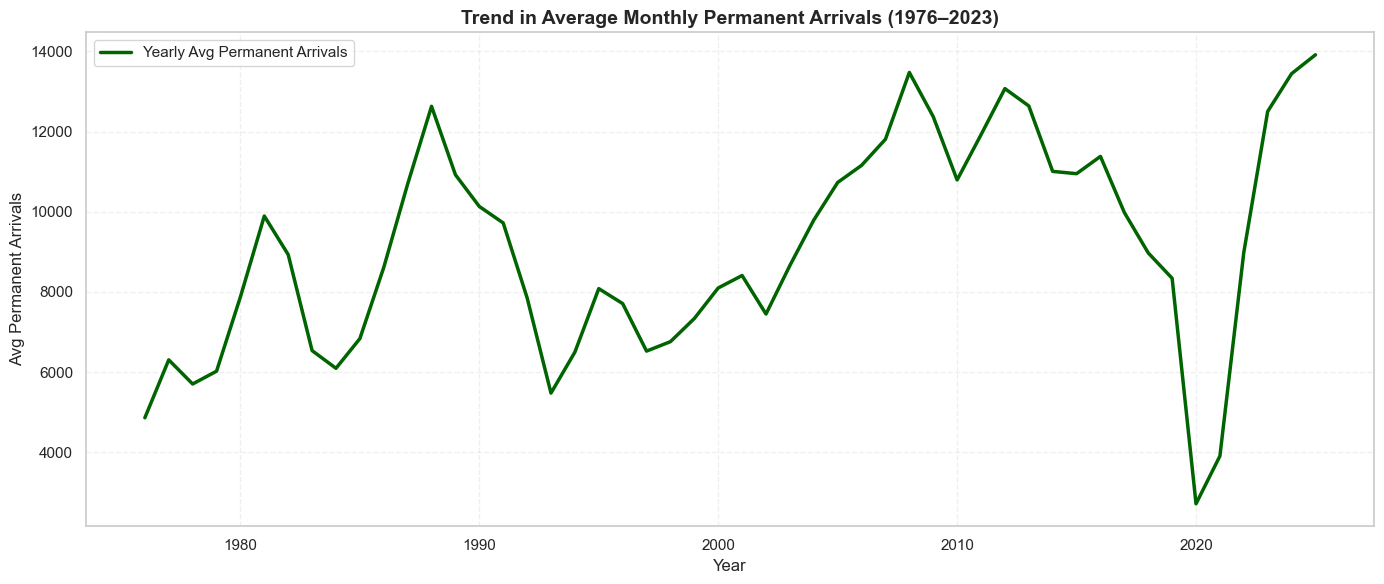

In [127]:
# Prep
data['Year'] = data.index.year
data['Month'] = data.index.month_name()
monthly_avg = data.groupby(['Year'])['Permanent Arrivals'].mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, label='Yearly Avg Permanent Arrivals', linewidth=2.5, color='darkgreen')
plt.title("Trend in Average Monthly Permanent Arrivals (1976–2023)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Avg Permanent Arrivals")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Initial Trend Analysis

The above visualization shows the yearly average of permanent arrivals to Australia. This initial view reveals a generally increasing trend in migration since the 1970s, with notable fluctuations that likely correspond to global events and policy changes. The simple trend line provides a baseline understanding before we add more detailed analysis with historical context.

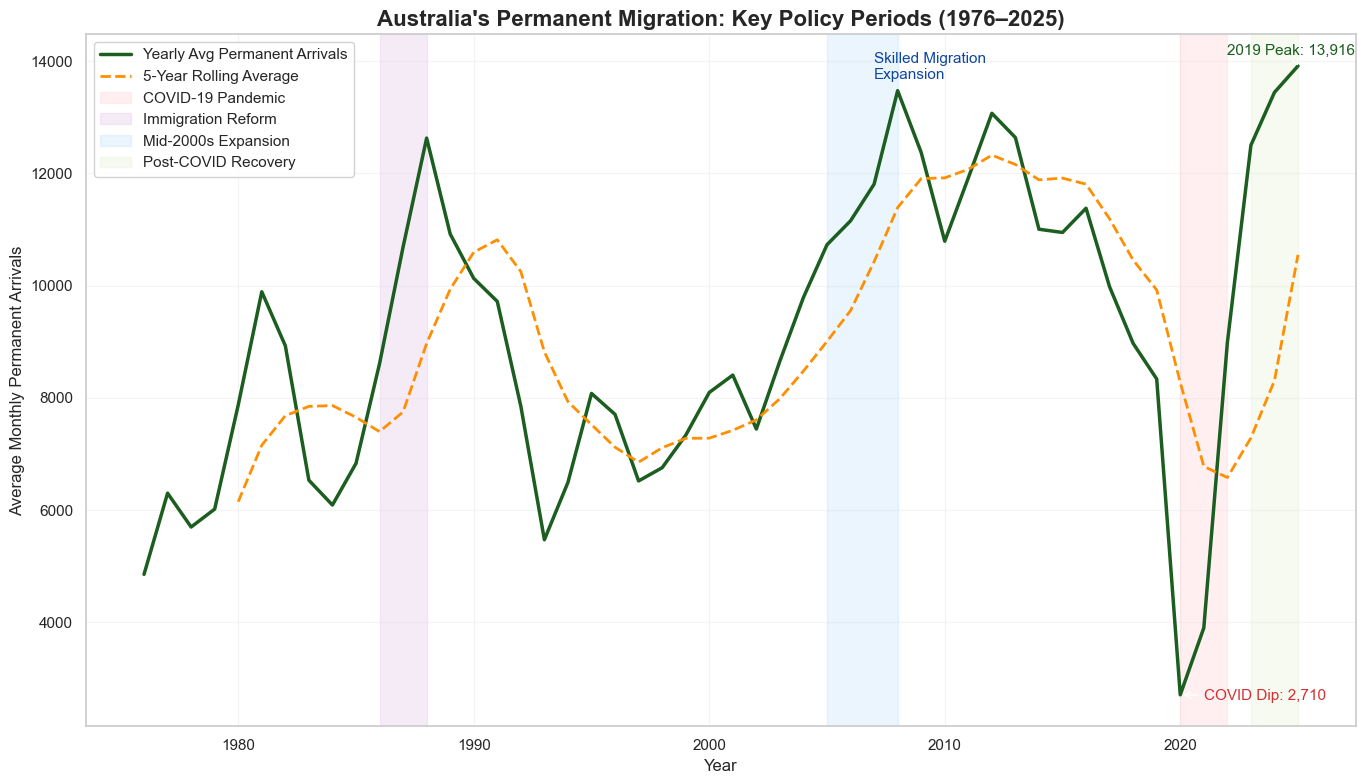

In [150]:
# Calculate rolling average
rolling_avg = monthly_avg.rolling(5).mean()

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create the main plot with better styling
sns.lineplot(data=monthly_avg, label='Yearly Avg Permanent Arrivals', color='#1b5e20', linewidth=2.5)
sns.lineplot(data=rolling_avg, label='5-Year Rolling Average', color='#ff8f00', linewidth=2, linestyle='--')

# Highlight key periods
plt.axvspan(2020, 2022, color='#ffcdd2', alpha=0.3, label='COVID-19 Pandemic')
plt.axvspan(1986, 1988, color='#e1bee7', alpha=0.3, label='Immigration Reform')
plt.axvspan(2005, 2008, color='#bbdefb', alpha=0.3, label='Mid-2000s Expansion')

# Annotate key points
plt.annotate(f'2019 Peak: {int(monthly_avg.max()):,}', 
             xy=(monthly_avg.idxmax(), monthly_avg.max()), 
             xytext=(monthly_avg.idxmax()-3, monthly_avg.max() + 200), 
             arrowprops=dict(arrowstyle='->'), fontsize=11, color='#1b5e20')
             
plt.annotate(f'COVID Dip: {int(monthly_avg.min()):,}', 
             xy=(monthly_avg.idxmin(), monthly_avg.min()), 
             xytext=(monthly_avg.idxmin()+1, monthly_avg.min() - 100), 
             arrowprops=dict(arrowstyle='->'), fontsize=11, color='#d32f2f')

# Add annotation for mid-2000s growth
mid_2000s_peak = monthly_avg.loc[2005:2008].idxmax()
plt.annotate(f'Skilled Migration\nExpansion', 
             xy=(mid_2000s_peak, monthly_avg.loc[mid_2000s_peak]), 
             xytext=(mid_2000s_peak-1, monthly_avg.loc[mid_2000s_peak] + 200), 
             arrowprops=dict(arrowstyle='->'), fontsize=11, color='#0d47a1')

# Add post-COVID recovery trend without text annotation
if 2023 in monthly_avg.index:
    plt.axvspan(2023, monthly_avg.index.max(), color='#dcedc8', alpha=0.25, label='Post-COVID Recovery')

# Clean up the plot
plt.title("Australia's Permanent Migration: Key Policy Periods (1976–2025)", 
          fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Monthly Permanent Arrivals", fontsize=12)
plt.grid(True, alpha=0.2)
plt.legend(loc='upper left', frameon=True, framealpha=0.9)
plt.tight_layout()
plt.show()

## Key Migration Periods and Policy Changes

This enhanced visualization adds critical context to Australia's migration patterns by identifying key policy periods and historical events:

1. **Immigration Reform (1986-1988)**: Australia implemented significant changes to its immigration system, including the introduction of a points-based skilled migration program that prioritized economic migrants over family reunification.

2. **Mid-2000s Expansion (2005-2008)**: Under the Howard government, Australia substantially expanded its skilled migration program to address labor shortages during the mining boom, resulting in record-high permanent migration intake.

3. **COVID-19 Pandemic (2020-2022)**: International border closures led to the sharpest decline in permanent arrivals in Australia's modern history. Migration levels dropped to their lowest point in decades.

4. **Post-COVID Recovery (2023 onwards)**: Migration levels have begun to rebound as border restrictions eased and pent-up demand for migration resumed.

The 5-year rolling average (orange dashed line) smooths out short-term fluctuations to reveal the long-term migration trend, which shows steady growth interrupted only by the unprecedented COVID-19 disruption.

In [192]:
# load the population data
aus_pop = pd.read_excel('aus_energy_table_c.xlsx', sheet_name='AUS', skiprows=4, header=None)


In [ ]:
aus_pop.columns = aus_pop.iloc[0]
aus_pop = aus_pop.drop([0, 1]).reset_index(drop=True)
aus_pop.columns.values[1] = 'year' 
aus_pop.set_index('year', inplace=True)
keep_cols = ['Population', 'GDP', 'Energy consumption']
aus_pop = aus_pop[keep_cols]
aus_pop.columns = [col.lower().replace(' ', '_') for col in aus_pop.columns]
aus_pop = aus_pop.apply(pd.to_numeric, errors='coerce')
aus_pop = aus_pop[:-5]
aus_pop.reset_index(inplace=True)
aus_pop['year'] = aus_pop['year'].astype(str).str.extract(r'(\d{4})').astype(int)

In [196]:
aus_pop.head(10)
aus_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                63 non-null     int64  
 1   population          63 non-null     float64
 2   gdp                 63 non-null     float64
 3   energy_consumption  63 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


## Integrating Socioeconomic Context

To understand migration's broader impact, we're integrating three key socioeconomic datasets:

1. **Population data**: Total Australian resident population by year
2. **GDP data**: Australia's annual economic output 
3. **Energy consumption**: National energy usage in petajoules

These metrics will help us assess how migration patterns relate to Australia's demographic growth, economic development, and resource utilization over nearly five decades.

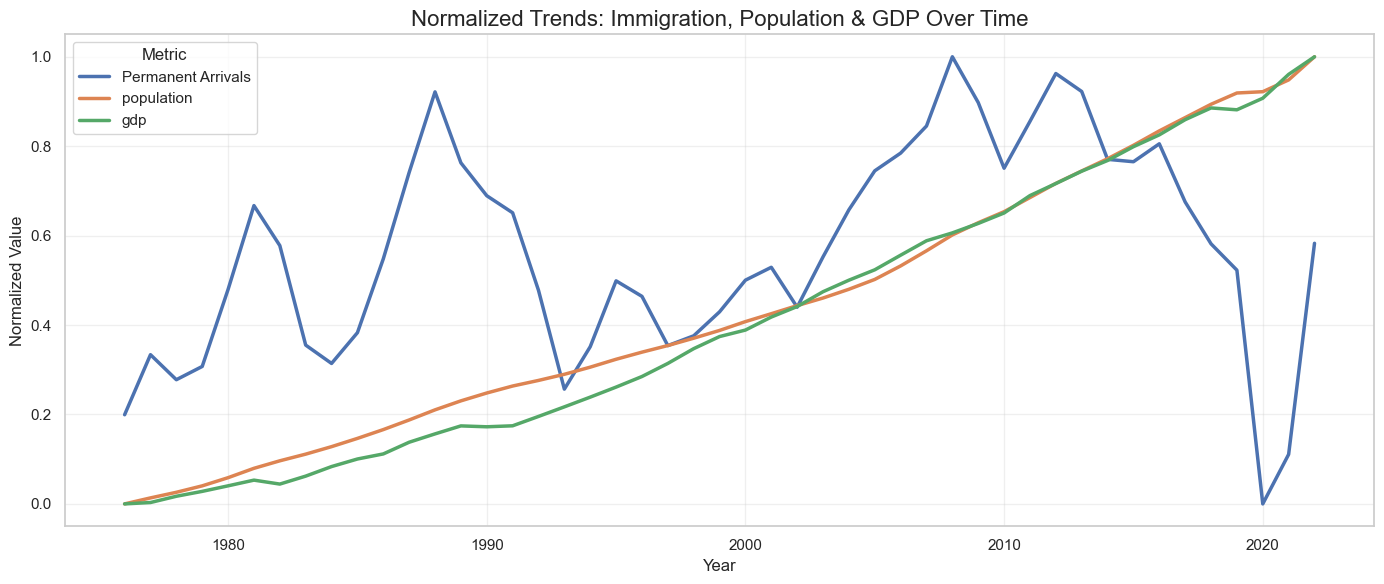

In [201]:
# 1. Aggregate immigration by year
immigration_by_year = data.groupby('year')['Permanent Arrivals'].sum().reset_index()

# 2. Merge with population and GDP
merged = pd.merge(immigration_by_year, aus_pop, on='year', how='inner')

# 3. Normalize values for comparison
merged_norm = merged.copy()
cols_to_norm = ['Permanent Arrivals', 'population', 'gdp']
merged_norm[cols_to_norm] = merged[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# 4. Melt for Seaborn
df_melted = pd.melt(merged_norm, id_vars='year', value_vars=cols_to_norm,
                    var_name='Metric', value_name='Normalized Value')

# 5. Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_melted, x='year', y='Normalized Value', hue='Metric', linewidth=2.5)
plt.title('Normalized Trends: Immigration, Population & GDP Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Synchronized Growth Patterns

This normalized comparison reveals how permanent immigration, population, and GDP have grown relative to their respective ranges. The visualization shows:

- **Strong correlation**: All three metrics show general upward trends, suggesting interconnected growth
- **Periodic divergence**: Immigration shows more volatility than population or GDP, reflecting policy changes and external events
- **GDP-immigration relationship**: Economic growth phases tend to align with increased immigration, suggesting potential bidirectional causality

Normalization is particularly useful here as it allows us to compare variables with very different scales (thousands of immigrants versus millions of population versus billions in GDP).

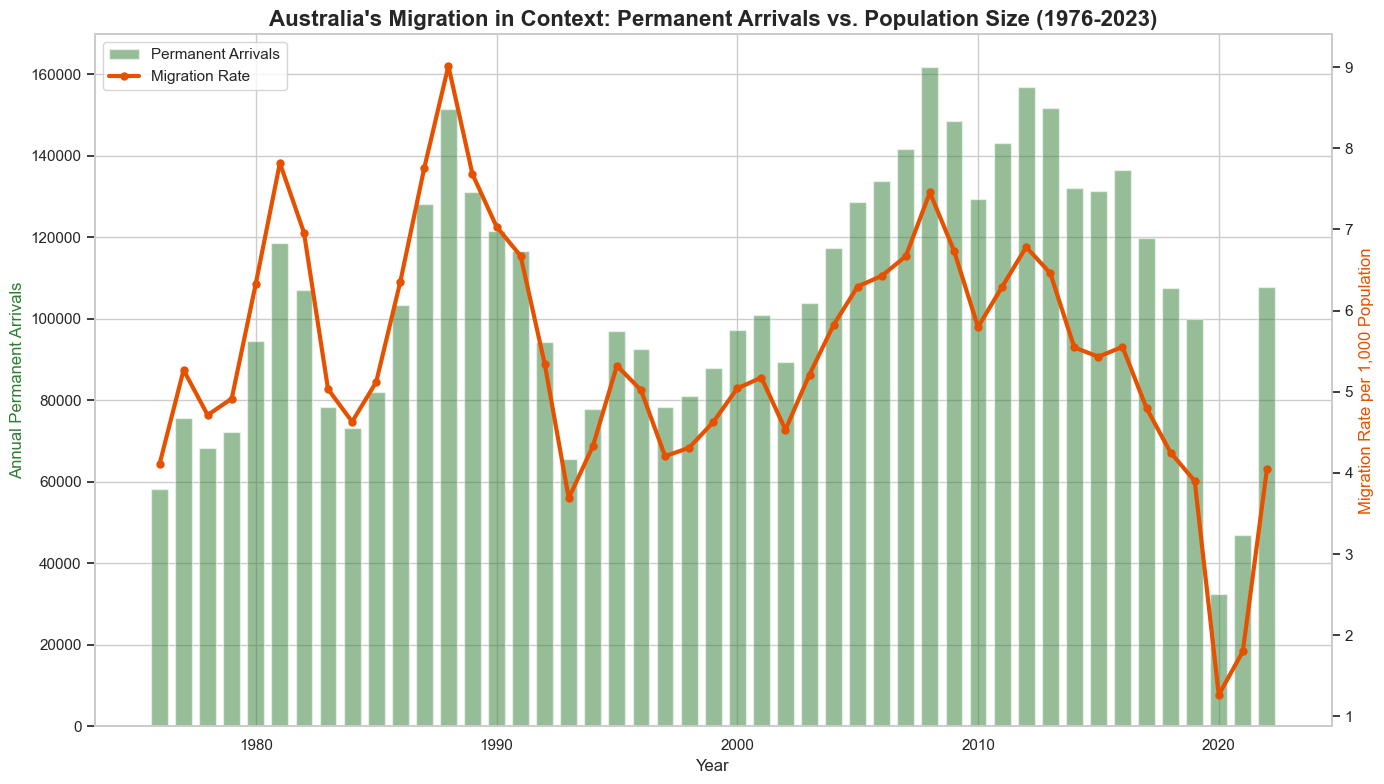

In [202]:
# First, prepare annual permanent arrivals data
annual_arrivals = data.groupby('Year')['Permanent Arrivals'].sum().reset_index()
annual_arrivals.columns = ['year', 'permanent_arrivals']

# Merge with population data
merged_df = pd.merge(annual_arrivals, aus_pop, on='year', how='inner')

# Calculate migration rate per 1,000 population
merged_df['migration_rate'] = (merged_df['permanent_arrivals'] / merged_df['population']) * 1000

# Create the visualization
plt.figure(figsize=(14, 8))

# Create primary axis for total arrivals
ax1 = plt.gca()
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Annual Permanent Arrivals', fontsize=12, color='#2e7d32')
ax1.bar(merged_df['year'], merged_df['permanent_arrivals'], alpha=0.5, color='#2e7d32', width=0.7, label='Permanent Arrivals')

# Create secondary axis for migration rate
ax2 = ax1.twinx()
ax2.set_ylabel('Migration Rate per 1,000 Population', fontsize=12, color='#e65100')
ax2.plot(merged_df['year'], merged_df['migration_rate'], color='#e65100', linewidth=3, marker='o', markersize=5, label='Migration Rate')

# Title and styling
plt.title("Australia's Migration in Context: Permanent Arrivals vs. Population Size (1976-2023)", fontsize=16, fontweight='bold')
plt.grid(False)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

## Migration Rate Analysis

This visualization contextualizes raw migration numbers by showing the migration rate per 1,000 population, providing a more meaningful perspective on Australia's changing migration landscape:

- **Scale of impact**: While raw immigration numbers have increased over time, this partly reflects Australia's growing population base
- **Intensity of migration**: The migration rate (orange line) shows how immigration has intensified relative to population size over different periods
- **Policy effectiveness**: Peak migration rates in the mid-2000s and 2018-2019 reflect policy decisions to increase permanent migration intake
- **COVID impact**: The dramatic drop in both raw numbers and rates during 2020-2022 highlights the unprecedented nature of this disruption

By 2023, both metrics began to recover, though it remains to be seen whether they will return to pre-pandemic levels.

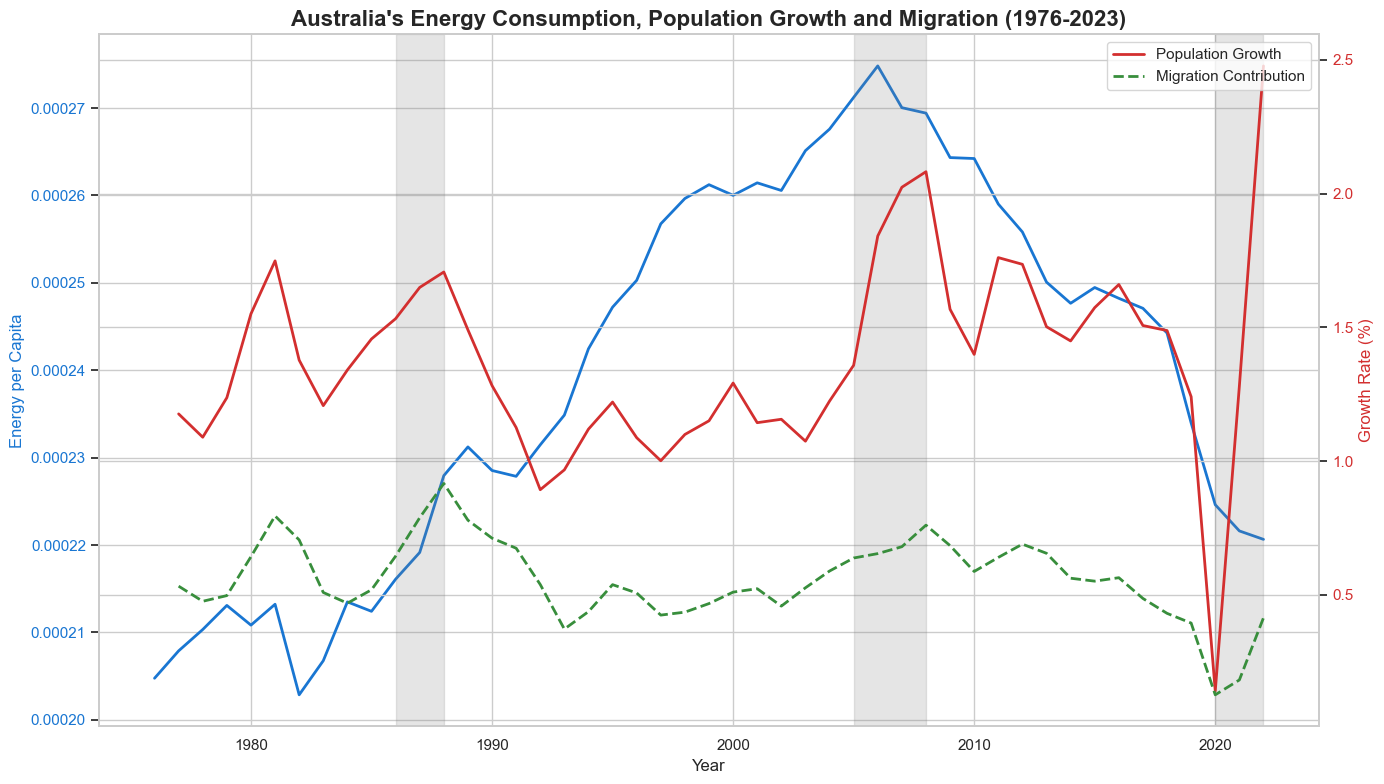

In [203]:
# Calculate annual metrics
merged_df['energy_per_capita'] = merged_df['energy_consumption'] / merged_df['population']
merged_df['population_growth'] = merged_df['population'].pct_change() * 100
merged_df['migration_contribution'] = (merged_df['permanent_arrivals'] / merged_df['population'].shift(1)) * 100

# Create multi-line plot showing relationships
fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#1976d2'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Energy per Capita', color=color1, fontsize=12)
ax1.plot(merged_df['year'], merged_df['energy_per_capita'], color=color1, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second axis for population metrics
ax2 = ax1.twinx()
color2 = '#d32f2f'
ax2.set_ylabel('Growth Rate (%)', color=color2, fontsize=12)
ax2.plot(merged_df['year'], merged_df['population_growth'], color=color2, linewidth=2, label='Population Growth')
ax2.plot(merged_df['year'], merged_df['migration_contribution'], color='#388e3c', linewidth=2, linestyle='--', 
         label='Migration Contribution')
ax2.tick_params(axis='y', labelcolor=color2)

# Highlight key periods from your migration analysis
for period in [(1986, 1988), (2005, 2008), (2020, 2022)]:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.title("Australia's Energy Consumption, Population Growth and Migration (1976-2023)", 
          fontsize=16, fontweight='bold')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Migration and Resource Utilization

This multidimensional analysis examines the relationship between migration, population growth, and energy consumption:

- **Energy intensity**: Energy consumption per capita (blue line) has remained relatively stable despite significant population growth, suggesting efficiency improvements in energy use

- **Growth drivers**: The gap between total population growth (red line) and migration contribution (green dashed line) represents natural population increase (births minus deaths)

- **Migration's contribution**: During peak migration periods (highlighted in gray), the migration contribution approached or even exceeded 50% of total population growth

- **Sustainability implications**: The relative stability of per capita energy consumption suggests that Australia has managed to absorb increased migration without proportional increases in per capita resource utilization

This visualization challenges simplistic narratives about immigration's impact on resource consumption by showing that population growth from migration has not led to proportional increases in per capita energy use.

# Conclusion: Key Takeaways from Australia's Migration Analysis

This analysis of Australia's permanent migration patterns from 1976 to 2025 has revealed significant insights into the interrelationship between migration, population dynamics, economic development, and resource utilization. Three key findings stand out:

## 1. Policy-Driven Migration Landscape

Australia's migration patterns have been primarily shaped by deliberate policy decisions rather than uncontrolled external forces. The data clearly shows how specific policy periods—such as the 1986-1988 immigration reforms, the mid-2000s skilled migration expansion, and the post-COVID recovery—directly influenced migration levels. This demonstrates that Australia has maintained a highly managed migration system that responds to economic needs and policy priorities, with the exception of the unprecedented COVID-19 disruption.

## 2. Economic-Migration Synchronicity

The strong correlation between GDP growth and increased permanent migration suggests a bidirectional relationship: economic prosperity enables higher migration intake, while increased migration contributes to economic expansion through population growth, labor market participation, and consumption. This synchronicity has been particularly evident during Australia's economic boom periods, where migration policy was explicitly aligned with economic objectives to address skill shortages and support growth sectors.

## 3. Sustainable Population Growth

Perhaps most significantly, our analysis challenges common assumptions about migration's impact on resource consumption. Despite migration contributing substantially to Australia's population growth over the past five decades, energy consumption per capita has remained remarkably stable. This suggests that Australia has managed to incorporate new permanent residents without proportional increases in resource utilization, likely through improved energy efficiency, technological advancement, and changing consumption patterns.

These findings have important implications for future policy development. As Australia continues to rely on immigration for population growth and economic development, understanding these historical patterns provides valuable context for designing migration policies that balance economic objectives with sustainability considerations.